<a href="https://colab.research.google.com/github/lNamelessl/ML-Projects/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf

In [2]:
# download data for apple
df  = yf.download('AAPL', start='2015-01-01', end='2023-12-31')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.320431,24.789800,23.879980,24.778677,212818400
2015-01-05,23.635281,24.169160,23.448424,24.089078,257142000
2015-01-06,23.637510,23.897776,23.274916,23.699796,263188400
2015-01-07,23.968967,24.069069,23.735394,23.846619,160423600
2015-01-08,24.889896,24.947734,24.180281,24.298181,237458000


In [4]:
import matplotlib.pyplot as plt

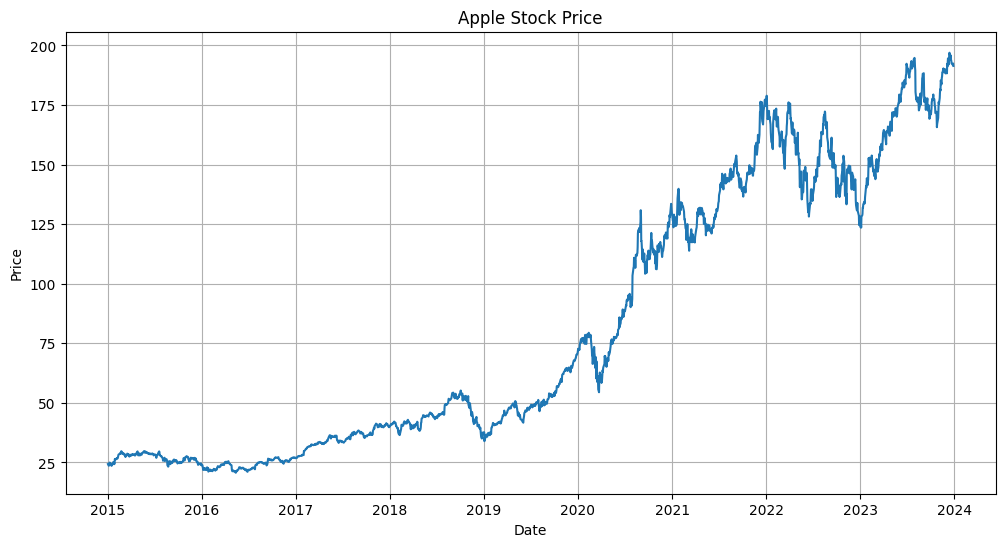

In [5]:
df['Close'].ffill()

plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title('Apple Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [6]:
# moving averages
df['MA7'] = df['Close'].rolling(window=7).mean()
df['MA30'] = df['Close'].rolling(window=30).mean()

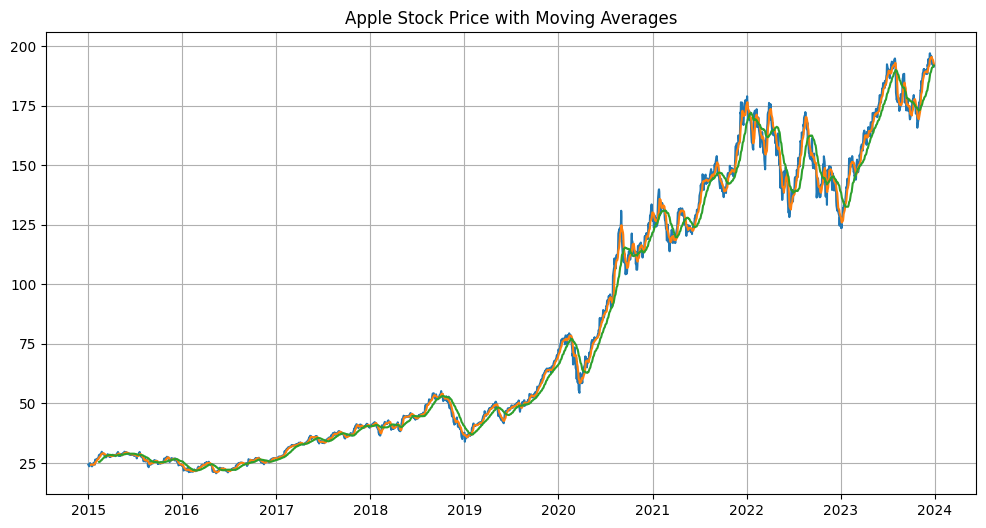

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['MA7'], label='7-day MA')
plt.plot(df['MA30'], label='30-day MA')
plt.title('Apple Stock Price with Moving Averages')
plt.grid(True)
plt.show()

In [8]:
df['Returns'] = df['Close'].pct_change()

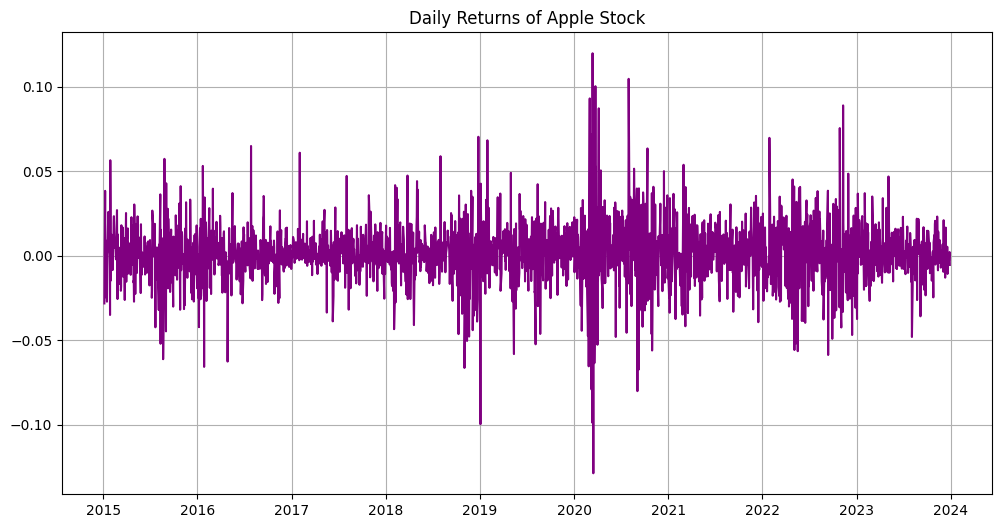

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(df['Returns'] , label='Daily Returns', color='purple')
plt.title('Daily Returns of Apple Stock')
plt.grid(True)
plt.show()

In [10]:
df.isnull().sum()

,,0
Price,Ticker,
Close,AAPL,0
High,AAPL,0
Low,AAPL,0
Open,AAPL,0
Volume,AAPL,0
MA7,,6
MA30,,29
Returns,,1


In [11]:
import pandas as pd


In [12]:
df.index = pd.to_datetime(df.index)
df = df.sort_index()

In [13]:
df.head()

Price,Close,High,Low,Open,Volume,MA7,MA30,Returns
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,
Date,,,,,,,,
2015-01-02,24.320431,24.789800,23.879980,24.778677,212818400,NaN,NaN,NaN
2015-01-05,23.635281,24.169160,23.448424,24.089078,257142000,NaN,NaN,-0.028172
2015-01-06,23.637510,23.897776,23.274916,23.699796,263188400,NaN,NaN,0.000094
2015-01-07,23.968967,24.069069,23.735394,23.846619,160423600,NaN,NaN,0.014023
2015-01-08,24.889896,24.947734,24.180281,24.298181,237458000,NaN,NaN,0.038422


In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
result = adfuller(df['Close'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')  # if p-value > 0.05 -> Stationary else not




ADF Statistic: 0.24379359768144823
p-value: 0.9746136104277112


In [16]:
df_diff = df['Close'].diff().dropna()
result = adfuller(df_diff)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -10.921079291171576
p-value: 1.0376655046808863e-19


In [17]:
df_diff2 = df_diff.diff().dropna()  # Second-order differencing
result = adfuller(df_diff2)
print(f'p-value: {result[1]}')

p-value: 2.1539959797564515e-28


In [18]:
df_diff3 = df_diff2.diff().dropna()  # Third-order differencing
result = adfuller(df_diff3)
print(f'p-value: {result[1]}')

p-value: 0.0


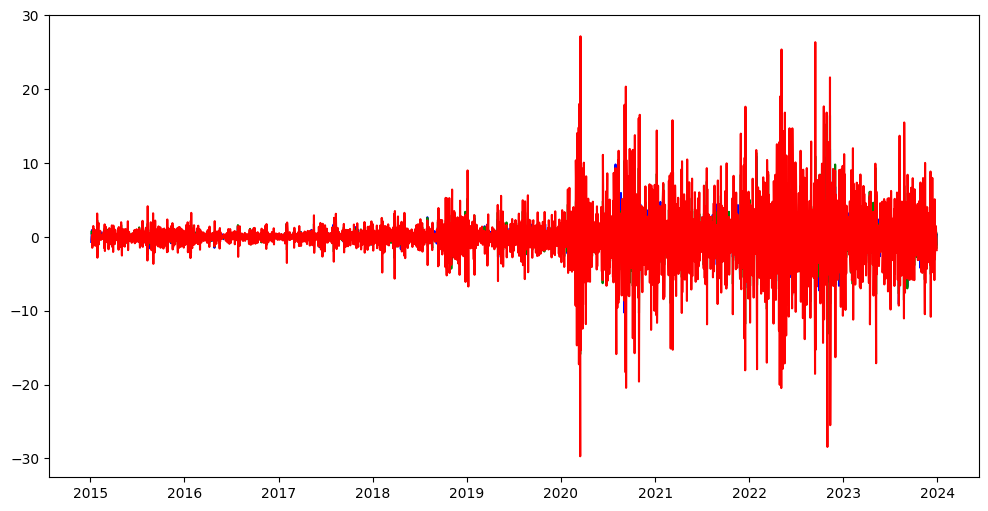

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df_diff, label='First-order Differencing', color='blue')
plt.plot(df_diff2, label='Second-order Differencing', color='green')
plt.plot(df_diff3, label='Third-order Differencing', color='red')

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

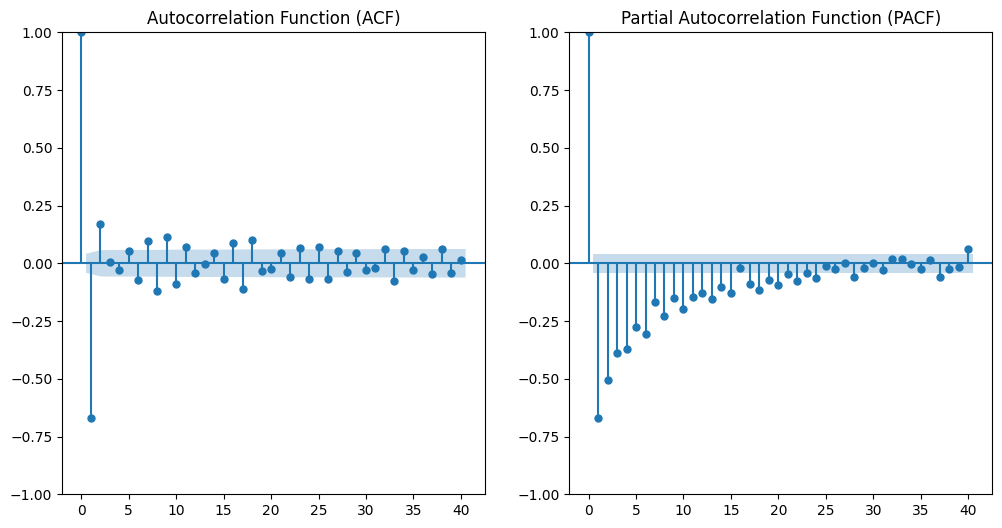

In [21]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_acf(df_diff3, lags=40,ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

plt.subplot(1, 2, 2)
plot_pacf(df_diff3, lags=40,ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')


plt.show()

In [22]:

# ACF - big spike at 1 -> q=1
# RCF - big spike at 1 -> p=1


In [23]:
from statsmodels.tsa.arima.model import ARIMA

In [24]:
model = ARIMA(df['Close'], order=(1, 1, 1))
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [25]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                 2264
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4524.534
Date:                Wed, 30 Apr 2025   AIC                           9055.067
Time:                        11:59:32   BIC                           9072.241
Sample:                             0   HQIC                          9061.334
                               - 2264                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3987      0.251      1.590      0.112      -0.093       0.890
ma.L1         -0.4384      0.247     -1.772      0.076      -0.923       0.047
sigma2         3.1926      0.047     67.227      0.0

In [26]:
# Forecast the next 30 days
n_steps = 30
forecast = model_fit.forecast(steps=n_steps)

# Let's see the forecasted values
print(forecast)

2264    191.418294
2265    191.433177
2266    191.439110
2267    191.441476
2268    191.442419
2269    191.442795
2270    191.442945
2271    191.443005
2272    191.443029
2273    191.443039
2274    191.443042
2275    191.443044
2276    191.443044
2277    191.443045
2278    191.443045
2279    191.443045
2280    191.443045
2281    191.443045
2282    191.443045
2283    191.443045
2284    191.443045
2285    191.443045
2286    191.443045
2287    191.443045
2288    191.443045
2289    191.443045
2290    191.443045
2291    191.443045
2292    191.443045
2293    191.443045
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


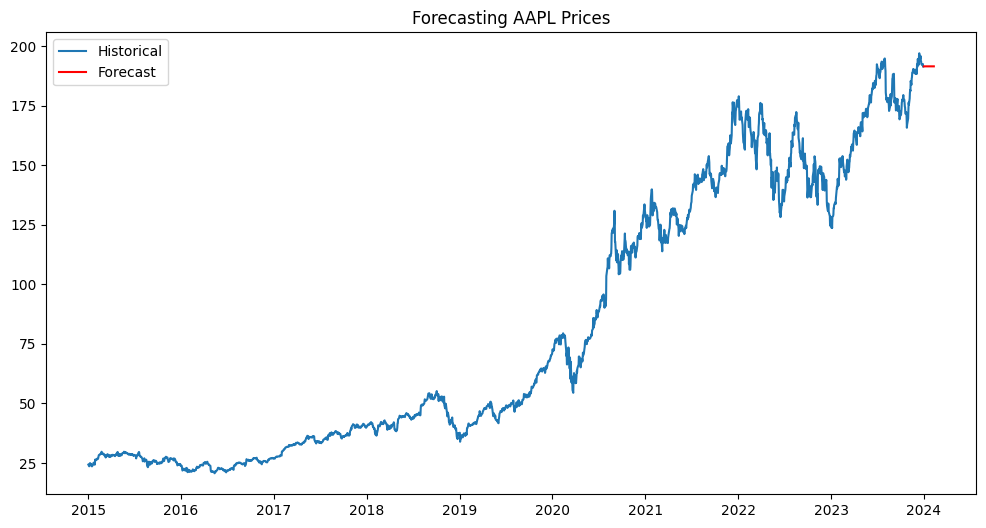

In [27]:
# Plot the historical data
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Historical')

# Plot the forecast
forecast_index = pd.date_range(start=df.index[-1], periods=n_steps+1, freq='B')[1:]  # 'B' = Business Day
plt.plot(forecast_index, forecast, label='Forecast', color='red')

plt.title('Forecasting AAPL Prices')
plt.legend()
plt.show()

In [45]:
from prophet import Prophet

In [53]:
# prepare the data
data = df[['Close']].values

In [55]:
from sklearn.preprocessing import MinMaxScaler

In [56]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [57]:
# create training and testing datasets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [58]:
# create the dataset with lookback
def create_dataset(data, lookback=60):
  X, Y = [], []
  for i in range(lookback, len(data)):
    X.append(data[i-lookback:i])
    Y.append(data[i])
  return np.array(X), np.array(Y)

In [60]:
import numpy as np


In [61]:
X_train, y_train = create_dataset(train_data)
X_test, y_test = create_dataset(test_data)

In [62]:
# Reshape input to be [samples, time steps, feature]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [63]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [64]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [65]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [66]:
# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.0686
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0021
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0011
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 7.5536e-04
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 7.9368e-04
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 6.7333e-04
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 6.0561e-04
Epoch 8/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 7.7506e-04
Epoch 9/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 6.3286e-04
Epoch 10/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 4.7998e-04
Epoch 11/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 4.6129e-04
Epoch 12/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 5.2555e-04
Epoch 13/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 4.4860e-04
Epoch 14/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 4.0874e-04
Epoch 15/100


In [67]:
# make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step


In [69]:
# Invert predictions to scale
train_predictions = scaler.inverse_transform(train_predictions)
Y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predictions = scaler.inverse_transform(test_predictions)
Y_test = scaler.inverse_transform(y_test.reshape(-1, 1))


In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [72]:
import math

In [80]:
train_mse = math.sqrt(mean_squared_error(Y_train, train_predictions[:,0]))
test_mae = math.sqrt(mean_absolute_error(Y_test, test_predictions[:,0]))
print('Train RMSE: %.2f RMSE' % train_mse)
print('Test MAE: %.2f MAE' % test_mae)

Train RMSE: 13522.00 RMSE
Test MAE: 166.06 MAE


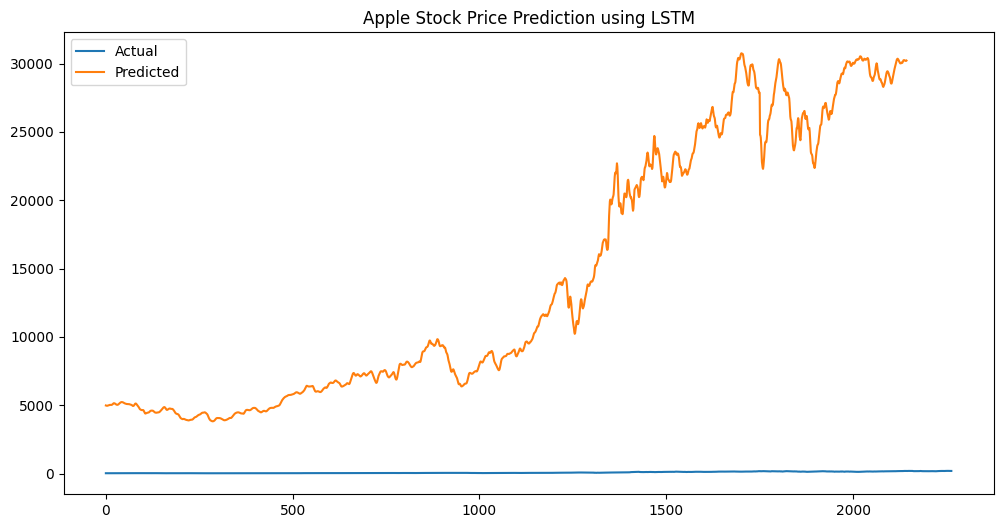

In [83]:
# 11. Plot the results
plt.figure(figsize=(12,6))
plt.plot(df['Close'].values, label='Actual')
plt.plot(np.concatenate((train_predictions[:,0], test_predictions[:,0])), label='Predicted')
plt.legend()
plt.title('Apple Stock Price Prediction using LSTM')
plt.show()